In [1]:
import sys
sys.path.append('../code')

In [2]:
import propagation as prop
import numpy as np
import matplotlib.pyplot as plt
import torch

In [3]:
rois = 'C:/Users/Fredrik/Desktop/AnnotateTest/Results/Hcellsmay/dish1_compartment2_1/particles.npy'

In [4]:
rois = np.load(rois)

In [5]:
rois.shape

(52, 64, 64, 2)

In [6]:
P = prop.Propagator(image_size=(64, 64), padding=256)

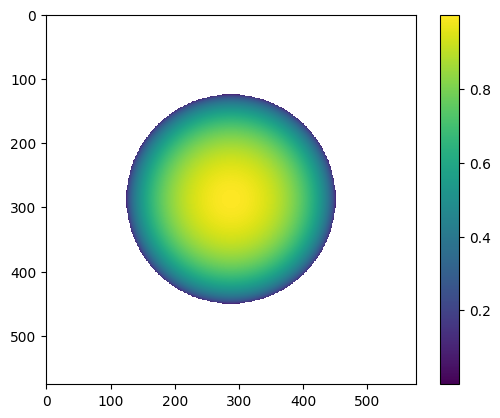

In [7]:
plt.imshow(P.K.real.cpu().numpy())
plt.colorbar()

In [8]:
Z = np.linspace(-10, 10, 51)

In [9]:
res = P.forward(rois[0], Z)

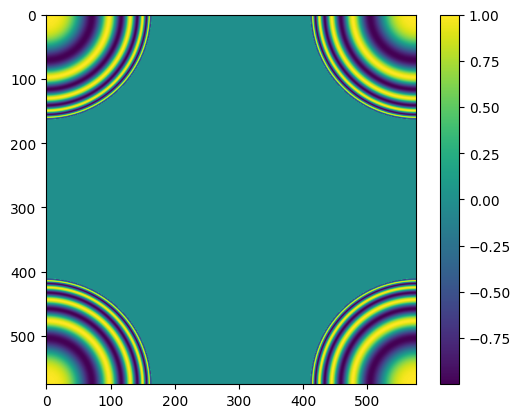

In [10]:
plt.imshow(P.Tz[20].real.cpu().numpy())
plt.colorbar()

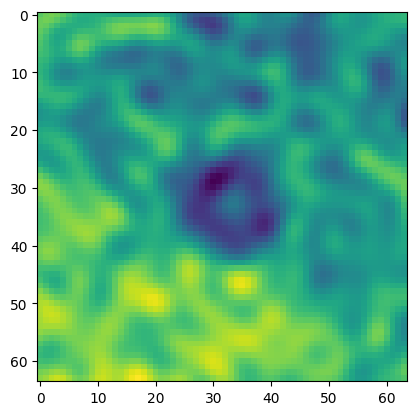

In [11]:
plt.imshow(rois[0,...,0])

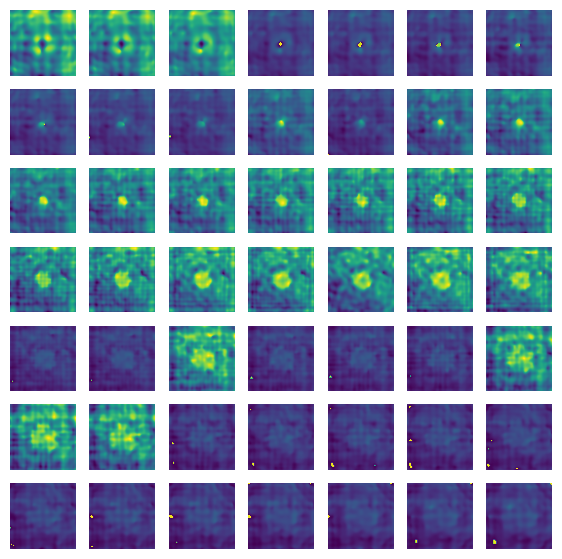

In [12]:
#Plot a grid of the results
#7x7 grid
fig, axs = plt.subplots(7, 7, figsize=(7, 7))

for i in range(7):
    for j in range(7):
        im = torch.angle(res[i*7 + j]).cpu()
        im = torch.remainder(im, 2*torch.pi)

        axs[i, j].imshow(im.cpu().numpy())
        axs[i, j].axis('off')


In [21]:
rf, rc = P.find_focus_field(rois[0], criterion='max', criterion_pre='laplace', return_crit=True)

torch.Size([51, 64, 64])


In [22]:
rc

tensor([0.2031, 0.2054, 0.2280, 0.2565, 0.4144, 0.4350, 0.4684, 0.4330, 0.4229,
        0.3577, 0.4435, 0.4661, 0.4197, 0.4727, 0.4785, 0.3452, 0.3889, 0.3650,
        0.3484, 0.4549, 0.4172, 0.4724, 0.3498, 0.3892, 0.3397, 0.4555, 0.5675,
        0.4166, 0.4504, 0.4643, 0.4702, 0.3612, 0.3779, 0.3265, 0.3722, 0.3253,
        0.3227, 0.3111, 0.3352, 0.2921, 0.2708, 0.3119, 0.3528, 0.3197, 0.3333,
        0.2595, 0.2440, 0.2579, 0.2376, 0.2245, 0.2345], device='cuda:0')

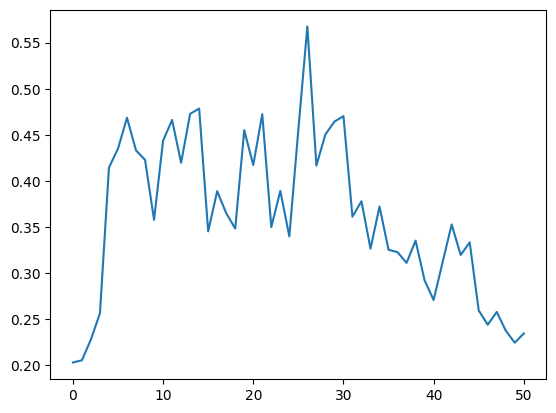

In [23]:
plt.plot(rc.cpu().numpy())

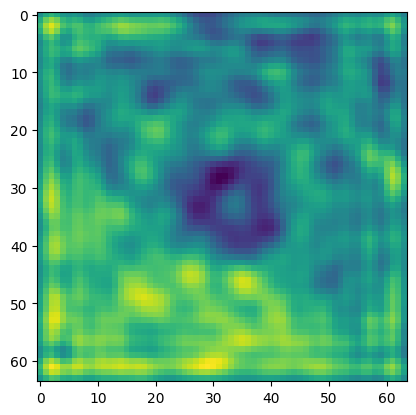

In [25]:
plt.imshow(rf.real.cpu().numpy())